## Overview

A [derivative](https://en.wikipedia.org/wiki/Derivative_(finance%29) is a contract that _derives_ its value from the performance of an underlying entity. Typical examples of derivatives include [future](https://en.wikipedia.org/wiki/Futures_contract), [forward](https://en.wikipedia.org/wiki/Forward_contract), option, [swap](https://en.wikipedia.org/wiki/Swap_(finance)).

An [option](https://en.wikipedia.org/wiki/Option_(finance%29) is a __derivative__ i.e. a contract that offers the buyer of the derivative the __right__ but not the obligation to buy or sell the underlying asset at a certain date in the future (expiry date), at a specified price (the strike price).

The [Black-Scholes formula](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model) enables the pricing of European styled options under various assumptions. The main idea behind the BS model leading to the close form formula is that an option can be dynamically replicated by a portfolio consisting of the underlying and a zero coupon bond.
In particular the risk of the option, which comes from uncertainty of the underlying, can be dynamically offset by trading the right amount of the underlying.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BlackScholes import BS_option, BS_imply_volatility

#### Set Parameters

In [8]:
spot = np.linspace(5, 200, 100)
K = 100
r = 0.03
T = 1
sigmas = [0.1, 0.3, 0.5, 0.7,.9]
opt_dict = {}
delta_dict = {}
gamma_dict = {}
for sigma in sigmas:
    opt_dict[f"call_{100*sigma}"] = [BS_option(S, K, T, r, sigma, 'C')[0] for S in spot]
    delta_dict[f"call_{100*sigma}"] = [BS_option(S, K, T, r, sigma, 'C')[1] for S in spot]
    gamma_dict[f"call_{100*sigma}"] = [BS_option(S, K, T, r, sigma, 'C')[2] for S in spot]
        
intrinsic_value = np.clip(spot-K, 0, None)

### Graph of [call](https://en.wikipedia.org/wiki/Call_option) price as a function of the underlying stock price
A call option is a contract that offers the buyer the right but not the obligation to **buy** the underlying asset at the expiry date, at a predefined strike price.

The price C of an option can be broken down into 2 non negative values: 
- Intrinsic Value: IV = Max(S-K, 0) for a call, also known as payout of the option
- Time Value: TV = C - IV


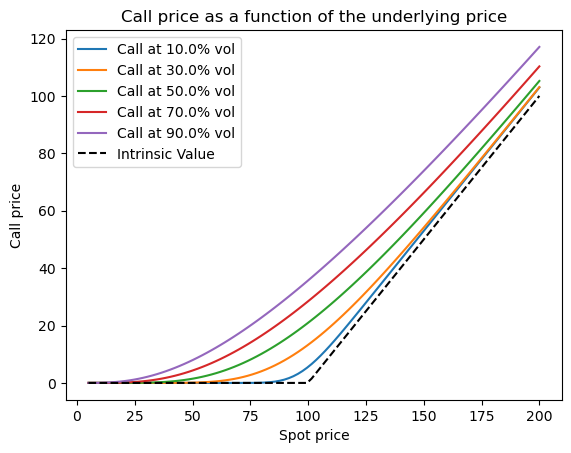

In [9]:
for sigma in sigmas:
    plt.plot(spot, opt_dict[f"call_{100*sigma}"], label=f"Call at {100*sigma}% vol")
plt.plot(spot, intrinsic_value, "k--", label="Intrinsic Value")
plt.title("Call price as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Call price")
plt.legend();

As could be expected, the call prices are always higher than the intrinsic value, represented by the hockey stick dotted black line. The difference between the 2 corresponds to the time value. The time value is maximum at the strike as can be seen on the graph below. The higher the volatility, the higher the time value.

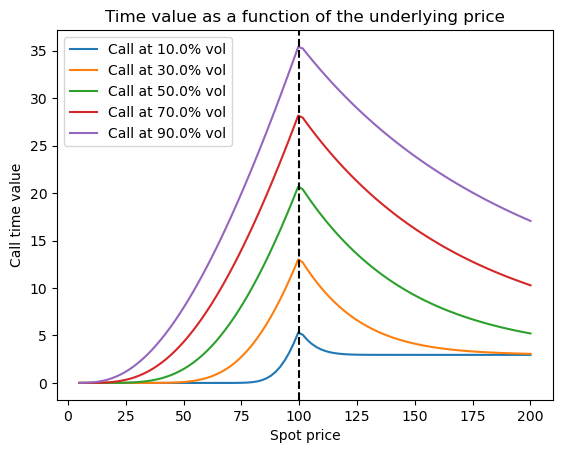

In [10]:
for sigma in sigmas:
    plt.plot(spot, opt_dict[f"call_{100*sigma}"]-intrinsic_value, label=f"Call at {100*sigma}% vol")
plt.axvline(x=K, linestyle="--", color='k')
plt.title("Time value as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Call time value")
plt.legend();

## Option Greeks
[Greeks](https://en.wikipedia.org/wiki/Greeks_(finance)) represent the sensitivity of the price of a derivative instrument such as an option to changes in one or more underlying parameters on which the value of an instrument is dependent

![Local Image](./images/greeks.png)

### Graph of call delta as a function of the underlying stock price

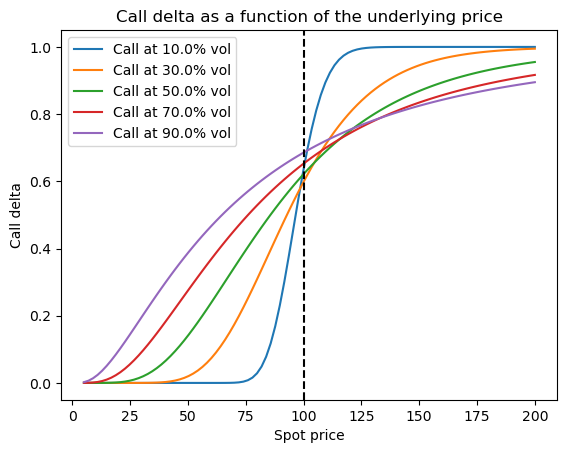

In [11]:
for sigma in sigmas:
    plt.plot(spot, delta_dict[f"call_{100*sigma}"], label=f"Call at {100*sigma}% vol")
plt.axvline(x=K, linestyle="--", color='k')
plt.title("Call delta as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Call delta")
plt.legend();

The __delta__ of an option is the first derivative of the price with respect to the underlying stock price. The delta of a call option is always positive since the price is an increasing function of the underlying stock price. In fact, the delta of a call option is always between 0 and 1. It is an increasing function of the underlying price, which roughly speaking has a S-shape. It is "close to 0.5" when the option is close to the at the money (i.e. when the stock price is close to the strike price). The higher the volatility, the flatter the curve is. For the extreme case of 0 volatility, the delta would be a step function 0 -> 1 with the step at the strike price.

### Graph of call gamma as a function of the underlying stock price

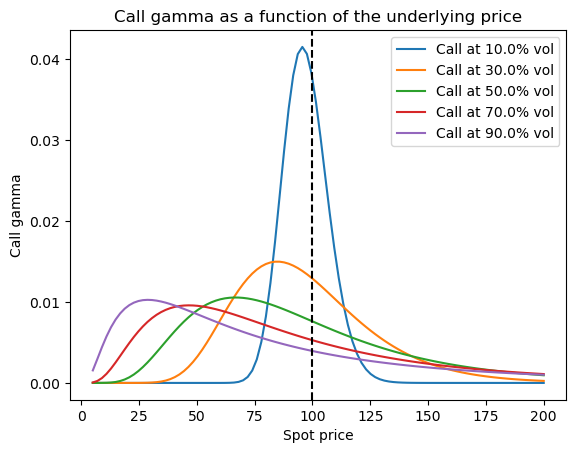

In [12]:
for sigma in sigmas:
    plt.plot(spot, gamma_dict[f"call_{100*sigma}"], label=f"Call at {100*sigma}% vol")
plt.axvline(x=K, linestyle="--", color='k')
plt.title("Call gamma as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Call gamma")
plt.legend();

The __gamma__ of an option is the second derivative of the price with respect to the underlying stock price. Which means that the gamma of an option is the first derivative of the delta with respect to the underlying stock price. It is always positive for a call option, as could be expected since the price of an option is a convex positive function of the underlying stock price. The higher the volatility the more spread out the gamma, and the lower the stock price at which the gamma is maximum. For the extreme case of 0 volatility, the gamma would a Dirac distribution.
